In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from imageio import imread
import cv2
from skimage import transform
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
import numpy as np

D:\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
data_dir = "D:\\AI Project\\Car-Bike-Dataset\\Data\\"

In [3]:
data = image_dataset_from_directory(data_dir, image_size=(100, 100), batch_size=32)

Found 4000 files belonging to 2 classes.


In [4]:
data = data.map(lambda x, y : (x/255, y))

In [5]:
len(data)

125

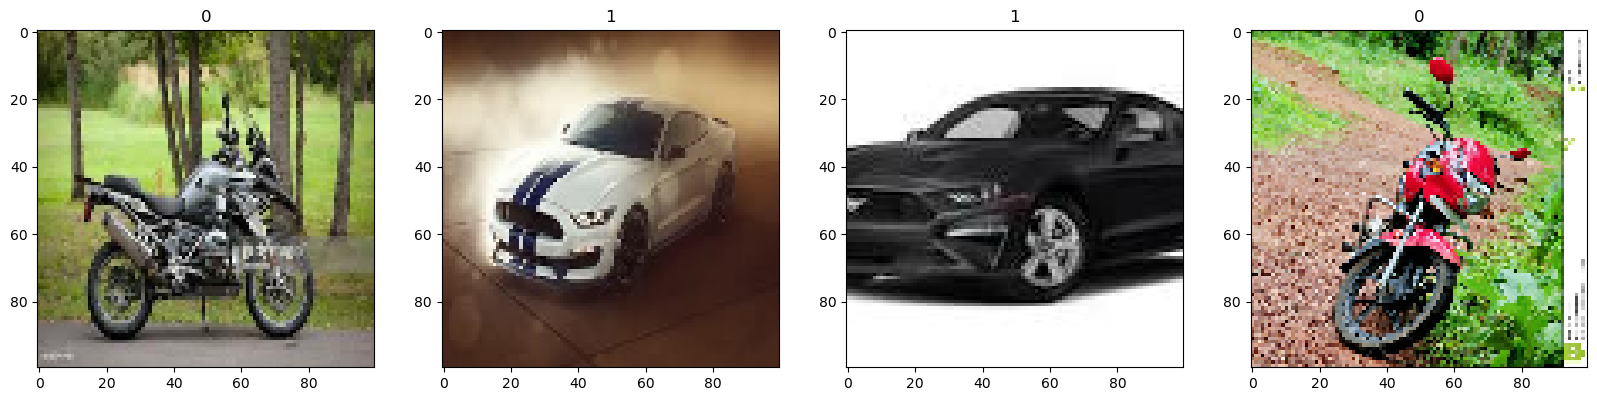

In [9]:
batch = data.as_numpy_iterator().next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# Bike = Class 0
# Car = Class 1

In [10]:
train_data = data.take(120)
val_data = data.skip(120).take(5)

In [11]:
len(train_data)

120

In [12]:
len(val_data)

5

In [13]:
model = Sequential([
        Conv2D(64, (7, 7), activation="relu", input_shape=(100, 100, 3)),
        MaxPooling2D(),
        Conv2D(32, (5, 5), activation="relu"),
        MaxPooling2D(),
        Conv2D(16, (3, 3), activation="relu"),
        MaxPooling2D(),
        Flatten(),
        Dense(16, activation="relu"),
        Dropout(0.5),
        Dense(1, activation="sigmoid")
    ])

model.compile(metrics=["accuracy"], loss="binary_crossentropy", optimizer="adam")

In [81]:
model.fit(train_data, validation_data = val_data, epochs=5)

Epoch 1/5
120/120 [==============================] - 78s 640ms/step - loss: 0.6126 - accuracy: 0.6341 - val_loss: 0.3420 - val_accuracy: 0.9000
Epoch 2/5
120/120 [==============================] - 84s 698ms/step - loss: 0.3369 - accuracy: 0.8661 - val_loss: 0.1784 - val_accuracy: 0.9500
Epoch 3/5
120/120 [==============================] - 83s 685ms/step - loss: 0.2871 - accuracy: 0.8906 - val_loss: 0.1882 - val_accuracy: 0.9250
Epoch 4/5
120/120 [==============================] - 92s 764ms/step - loss: 0.2651 - accuracy: 0.8961 - val_loss: 0.2338 - val_accuracy: 0.8875
Epoch 5/5
120/120 [==============================] - 87s 722ms/step - loss: 0.2316 - accuracy: 0.9107 - val_loss: 0.1569 - val_accuracy: 0.9312


In [15]:
test_data = image_dataset_from_directory("C:\\Users\\Waqas Kamran Marwat\\Desktop\\Test\\", image_size=(100, 100), batch_size=361)

Found 361 files belonging to 2 classes.


In [16]:
test_data = test_data.map(lambda x, y : (x/255, y))

In [17]:
len(test_data)

1

In [18]:
model.evaluate(test_data, verbose=2)

1/1 - 5s - loss: 0.2079 - accuracy: 0.9224 - 5s/epoch - 5s/step


[0.20789691805839539, 0.9224376678466797]